In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("instagram-translate.csv")
df

,Unnamed: 0,Steming,Text_Inggris
0,0,selamat,Happy
1,1,kakak maribelajar uang saku,"Brother, let's learn pocket money"
2,2,tolong tag kakak,please tag brother
3,3,kakmaaf kakak,I'm sorry brother
4,4,selamat malam kakak mohon maaf ganggu buka lin...,"Good evening, bro, sorry for disturbing you, o..."
...,...,...,...
412,412,siaap kakak,ready brother
413,413,min ajar hari jam jam,min teach day hour hour hour
414,414,umum kakak,general brother
415,415,min langsung apply test,"Min, apply directly for the test"


In [3]:
df = df.drop(labels="Unnamed: 0", axis=1)

In [4]:
df.columns

Index(['Steming', 'Text_Inggris'], dtype='object')

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to C:\Users\Laurence
[nltk_data]     Nicholas S\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [6]:
sentiment = SentimentIntensityAnalyzer()
df["Compound"] = [sentiment.polarity_scores(i)["compound"] for i in df["Text_Inggris"]]
df.head()

,Steming,Text_Inggris,Compound
0,selamat,Happy,0.5719
1,kakak maribelajar uang saku,"Brother, let's learn pocket money",0.0000
2,tolong tag kakak,please tag brother,0.3182
3,kakmaaf kakak,I'm sorry brother,-0.0772
4,selamat malam kakak mohon maaf ganggu buka lin...,"Good evening, bro, sorry for disturbing you, o...",0.6369


In [7]:
score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append("Positif")
    elif i <= -0.05:
        sentiment.append("Negatif")
    else:
        sentiment.append("Netral")
df["Label"] = sentiment
df.head(100)

,Steming,Text_Inggris,Compound,Label
0,selamat,Happy,0.5719,Positif
1,kakak maribelajar uang saku,"Brother, let's learn pocket money",0.0000,Netral
2,tolong tag kakak,please tag brother,0.3182,Positif
3,kakmaaf kakak,I'm sorry brother,-0.0772,Negatif
4,selamat malam kakak mohon maaf ganggu buka lin...,"Good evening, bro, sorry for disturbing you, o...",0.6369,Positif
...,...,...,...,...
95,kakak lulus berkas spjtm kelulus pengaruh,Brother passed the SPJTM file and passed the i...,0.0000,Netral
96,oohhh min,oohhh min,0.0000,Netral
97,hi dear daftar buka daftar beberapa jalur ajar...,"hi dear, register, open the list of several te...",0.3818,Positif
98,hi dear berkas sesuai syarat tentu,"hi dear, the file meets the requirements of co...",0.3818,Positif


In [8]:
df[['Steming','Label']]

,Steming,Label
0,selamat,Positif
1,kakak maribelajar uang saku,Netral
2,tolong tag kakak,Positif
3,kakmaaf kakak,Negatif
4,selamat malam kakak mohon maaf ganggu buka lin...,Positif
...,...,...
412,siaap kakak,Positif
413,min ajar hari jam jam,Netral
414,umum kakak,Netral
415,min langsung apply test,Netral


In [9]:
pd.value_counts(df['Label'])

C:\Users\Laurence Nicholas S\AppData\Local\Temp\ipykernel_7756\626637336.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Label'])


Label
Netral     229
Positif    164
Negatif     24
Name: count, dtype: int64

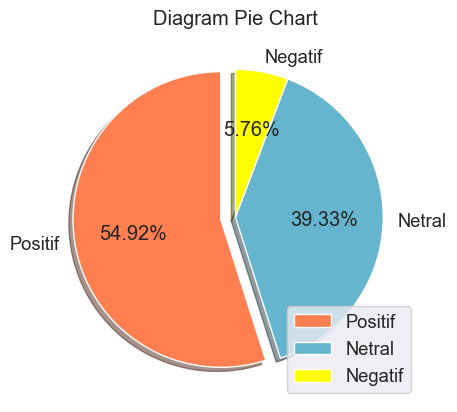

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
#pie chart
labels = ['Positif','Netral','Negatif']
Category2 = [229,164,24]
color = ['coral', 'c','yellow']
plt.pie(Category2, labels=labels, colors=color,startangle=90, shadow=True, autopct='%1.2f%%', explode=(0.1, 0, 0))
plt.title('Diagram Pie Chart')
plt.legend()
plt.show()

In [11]:
keep_col = ['Steming','Label']
new_df = df[keep_col]
new_df.to_csv("instagramcom-labeling.csv")